UCI Adult Dataset with Keras TF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()
    # scaler.fit(X_train)
    # X_train = scaler.transform(X_train)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test


def evaluate_model(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

In [3]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age',
         'workclass',
         'fnlwgt',
         'education',
         'education_num',
         'marital_status',
         'occupation',
         'relationship',
         'race',
         'sex',
         'capital_gain',
         'capital_loss',
         'hours_per_week',
         'native_country',
         'income']

df = pd.read_csv(url, names=column_names)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
df['income'] = df['income'].replace([' <=50K', ' >50K'], [0, 1])
df

<ipython-input-7-d6b20365b4e2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace([' <=50K', ' >50K'], [0, 1])


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
df_num = df.select_dtypes(include=[np.number])
df_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,0
32559,22,201490,9,0,0,20,0


In [10]:
data = df_num.values
data

array([[    39,  77516,     13, ...,      0,     40,      0],
       [    50,  83311,     13, ...,      0,     13,      0],
       [    38, 215646,      9, ...,      0,     40,      0],
       ...,
       [    58, 151910,      9, ...,      0,     40,      0],
       [    22, 201490,      9, ...,      0,     20,      0],
       [    52, 287927,      9, ...,      0,     40,      1]])

In [11]:
X = data[:, :-1]
y = data[:, -1]
X, y

(array([[    39,  77516,     13,   2174,      0,     40],
        [    50,  83311,     13,      0,      0,     13],
        [    38, 215646,      9,      0,      0,     40],
        ...,
        [    58, 151910,      9,      0,      0,     40],
        [    22, 201490,      9,      0,      0,     20],
        [    52, 287927,      9,  15024,      0,     40]]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [12]:
from sklearn.model_selection import train_test_split
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 6), (6513, 6), (26048,), (6513,))

In [13]:
# Normalization
X_train, X_test = normalize_data(X_train, X_test)
X_test, X_train

(array([[0.1369863 , 0.10044213, 0.6       , 0.        , 0.        ,
         0.37755102],
        [0.38356164, 0.02599938, 0.53333333, 0.        , 0.        ,
         0.39795918],
        [0.16438356, 0.11791676, 0.8       , 0.        , 0.        ,
         0.55102041],
        ...,
        [0.4109589 , 0.23217764, 0.93333333, 1.        , 0.        ,
         0.47959184],
        [0.1369863 , 0.02130302, 0.8       , 0.        , 0.        ,
         0.39795918],
        [0.01369863, 0.0092039 , 0.53333333, 0.        , 0.        ,
         0.24489796]]),
 array([[0.21917808, 0.12625338, 0.8       , 0.        , 0.        ,
         0.5       ],
        [0.26027397, 0.05037557, 0.66666667, 0.        , 0.43319559,
         0.5       ],
        [0.56164384, 0.12955135, 0.26666667, 0.        , 0.        ,
         0.39795918],
        ...,
        [0.01369863, 0.13854675, 0.4       , 0.        , 0.        ,
         0.19387755],
        [0.45205479, 0.02850817, 0.53333333, 0.        , 0.   

## Keras & TF

In [14]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

In [15]:
input_dimensions = X_train.shape[1]
input_dimensions, X_train.shape

(6, (26048, 6))

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=input_dimensions, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,217 (1.01 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=10)

# ModelCheckpoint
mc = ModelCheckpoint(filepath="best_model_sec1.keras",
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True,
                     )

In [21]:
# Train
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[es, mc])

Epoch 1/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7762 - loss: 0.4915
Epoch 1: val_accuracy improved from -inf to 0.82054, saving model to best_model_sec1.keras
652/652 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7762 - loss: 0.4914 - val_accuracy: 0.8205 - val_loss: 0.3928
Epoch 2/100
628/652 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4065
Epoch 2: val_accuracy did not improve from 0.82054
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8141 - loss: 0.4065 - val_accuracy: 0.8186 - val_loss: 0.3913
Epoch 3/100
635/652 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4054
Epoch 3: val_accuracy improved from 0.82054 to 0.82322, saving model to best_model_sec1.keras
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8119 - loss: 0.4055 - val_accuracy: 0.8232 - val_loss: 0.3918
Epoch 4/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8114 - loss: 0.4037
Epoch 4: val_accuracy improved from 0.82322 to 0.82821, saving

In [22]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8247 - loss: 0.3794
Test Loss: 0.37471911311149597, Test Accuracy: 0.8252725601196289


In [23]:
# Use best model
from keras.models import load_model
model = load_model('best_model_sec1.keras')

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.3738
Test Loss: 0.3691732883453369, Test Accuracy: 0.8275756239891052


In [24]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
y_pred

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [25]:
evaluate_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4942
           1       0.75      0.43      0.55      1571

    accuracy                           0.83      6513
   macro avg       0.79      0.69      0.72      6513
weighted avg       0.82      0.83      0.81      6513

[[4717  225]
 [ 898  673]]
0.8275756179947796


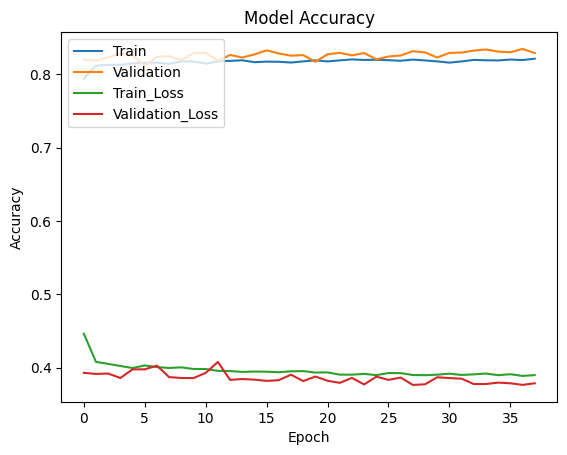

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train_Loss', 'Validation_Loss'], loc='upper left')